In [1]:
# import some common libraries
import torch, torchvision
import numpy as np
import pandas as pd
import cv2
import os
import random
import json
from tqdm import tqdm
from matplotlib import pyplot as plt

# import some detectron2 utilities
import detectron2
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.utils.logger import setup_logger
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor

# importing custom classes from the repo
from DataLoader import DataLoader
from ImageDisplayer import ImageDisplayer
from CustomVisualiser import CustomVisualizer


In [2]:
root_dir = "./../Data" # change this to download to a specific location on your pc
DataLoader().download_datasets(root_dir)
DataLoader().generateAllJsonDataAnnotations(root_dir)


MuscimaPlusPlus_V2 already exists
CVC_Muscima_Augmented already exists
MuscimaPlusPlus_Measure_Annotations already exists
Measure_Bounding_Box_Annotations_v2 already exists
./../Data\CVC_muscima_system_measures.json  already exists!
./../Data\AudioLabs_system_measures.json already exists!
./../Data\CVC_muscima_stave_measures.json  already exists!
./../Data\AudioLabs_stave_measures.json already exists!
./../Data\CVC_muscima_staves.json  already exists!
./../Data\AudioLabs_staves.json already exists!
./../Data\CVC_muscima_system_measures-staves.json  already exists!
./../Data\AudioLabs_system_measures-staves.json already exists!
./../Data\CVC_muscima_system_measures-stave_measures-staves.json  already exists!
./../Data\AudioLabs_system_measures-stave_measures-staves.json already exists!


In [3]:
# to decide which data should be loaded use this:

# type_of_annotation = ["system_measures"]
# type_of_annotation = ["stave_measures"]
type_of_annotation = ["staves"]

# type_of_annotation = ["system_measures", "stave_measures", "staves"]

json_pathname_extension = "-".join(str(elem) for elem in type_of_annotation)


In [4]:
json_path = os.path.join(root_dir, "CVC_muscima_" + json_pathname_extension + ".json")

muscima_data = DataLoader().load_from_json(json_path)
DataLoader().show_data(muscima_data, type_of_annotation)


{'file_name': './../Data\\CVC_Muscima_Augmented\\CVCMUSCIMA_MultiConditionAligned\\binary\\w-01\\p010.png', 'image_id': 0, 'height': 1710, 'width': 3487, 'annotations': [{'bbox': [216, 265, 3347, 384], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [221, 499, 3345, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [218, 734, 3344, 855], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [215, 971, 3344, 1089], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [215, 1205, 3344, 1323], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [219, 1439, 3344, 1560], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}]}
['staves']
1400


In [5]:
json_path = os.path.join(root_dir, "AudioLabs_" + json_pathname_extension + ".json")

audioLabs_data = DataLoader().load_from_json(json_path)
DataLoader().show_data(audioLabs_data, type_of_annotation)


{'file_name': './../Data\\Measure_Bounding_Box_Annotations_v2\\Beethoven_Op026-01\\img\\Beethoven_Op026-01_000.png', 'image_id': 0, 'height': 1057, 'width': 751, 'annotations': [{'bbox': [77, 231, 702, 260], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [77, 303, 702, 333], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 392, 702, 421], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 465, 702, 492], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 551, 699, 580], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 626, 699, 655], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 721, 698, 750], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 796, 698, 824], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 889, 694, 918], 

In [6]:
def registerDataset(data_name, d, data, classes):
    DatasetCatalog.register(data_name, lambda d=d: data)
    MetadataCatalog.get(data_name).set(thing_classes=classes)

    return MetadataCatalog.get(data_name)


In [7]:
muscima_metadata = registerDataset("muscima", "muscima", muscima_data, type_of_annotation)
audioLabs_metadata = registerDataset("audioLabs", "audioLabs", audioLabs_data, type_of_annotation)


# displaying the original bounding box annotations

./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\staffline-thickness-variation-v2\w-39\p020.png


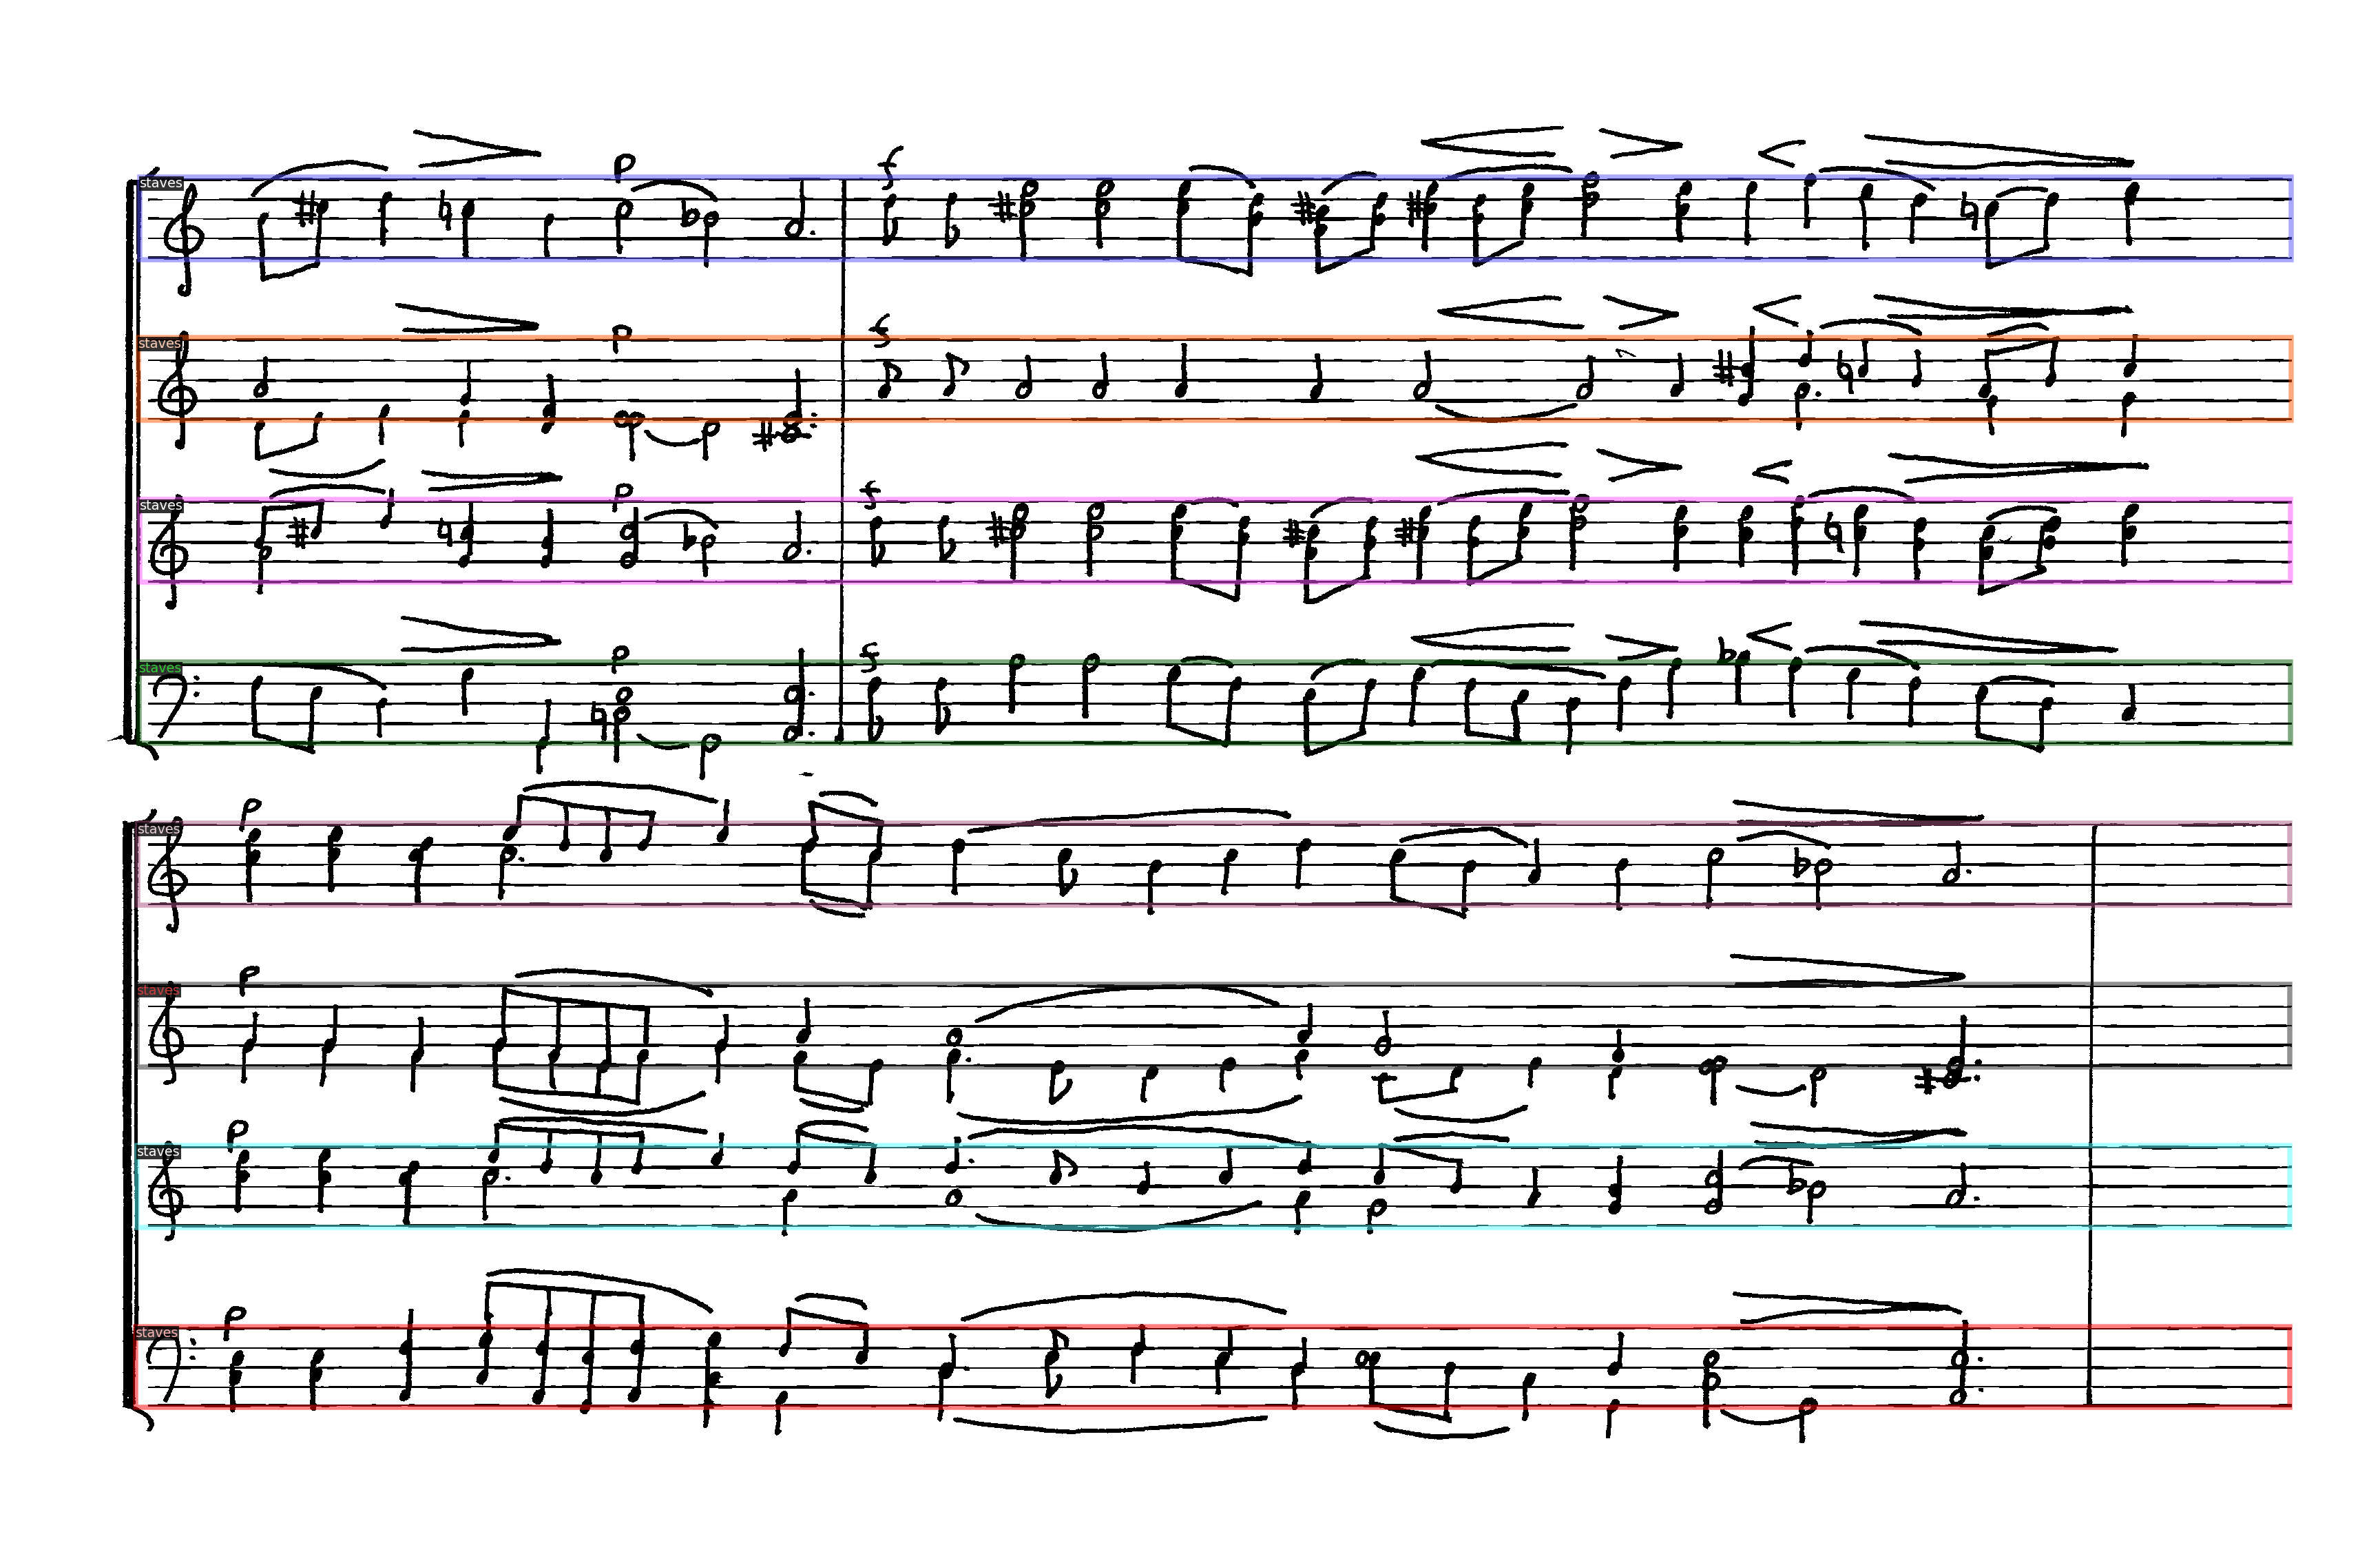

In [8]:
ImageDisplayer().displayRandomSampleData(muscima_data, muscima_metadata, 1, [type_of_annotation.index("staves")])


./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086B-2\img\Wagner_WWV086B_115.png


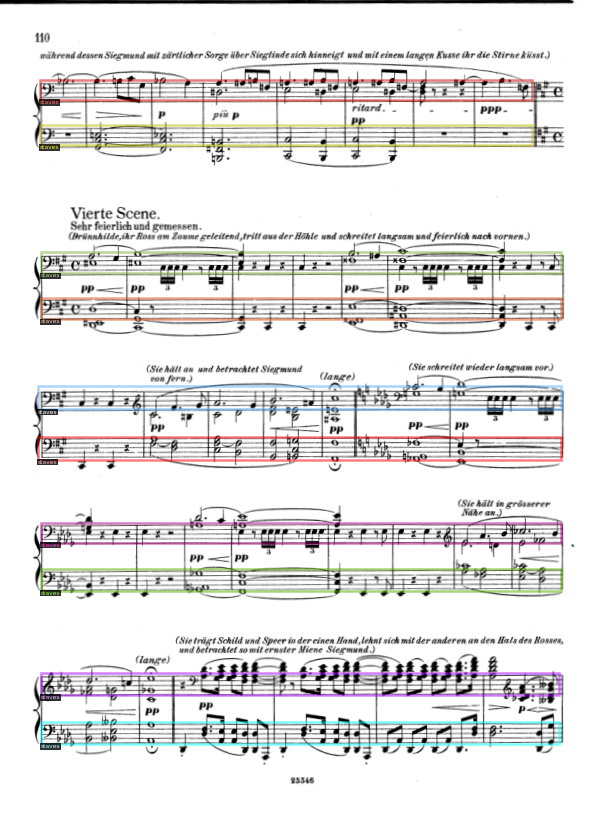

In [9]:
ImageDisplayer().displayRandomSampleData(audioLabs_data, audioLabs_metadata, 1, [type_of_annotation.index("staves")])


In [10]:
def setup_cfg(num_classes, cfg_file, existing_model_weight_path):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(cfg_file))

    cfg.MODEL.WEIGHTS = existing_model_weight_path

    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # set the testing threshold for this model. Model should be at least 20% confident detection is correct
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.2

    # Set seed to negative to fully randomize everything.
    # Set seed to positive to use a fixed seed. Note that a fixed seed increases
    # reproducibility but does not guarantee fully deterministic behavior.
    # Disabling all parallelism further increases reproducibility.
    cfg.SEED = 1

    return cfg


In [11]:
network_type = "R_50_FPN_3x"
# network_type = "R_101_FPN_3x"

model_dir = os.path.join(root_dir, "Models", network_type + "-" + json_pathname_extension)
cfg_file = "COCO-Detection/faster_rcnn_" + network_type + ".yaml"
weight_file = "final_" + json_pathname_extension + "_model.pth"
path_to_weight_file = os.path.join(model_dir, weight_file) 
cfg = setup_cfg(len(type_of_annotation), cfg_file, path_to_weight_file)

predictor = DefaultPredictor(cfg)


# display the predicted bounding boxes from the trained network

./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\kanungo\w-07\p008.png


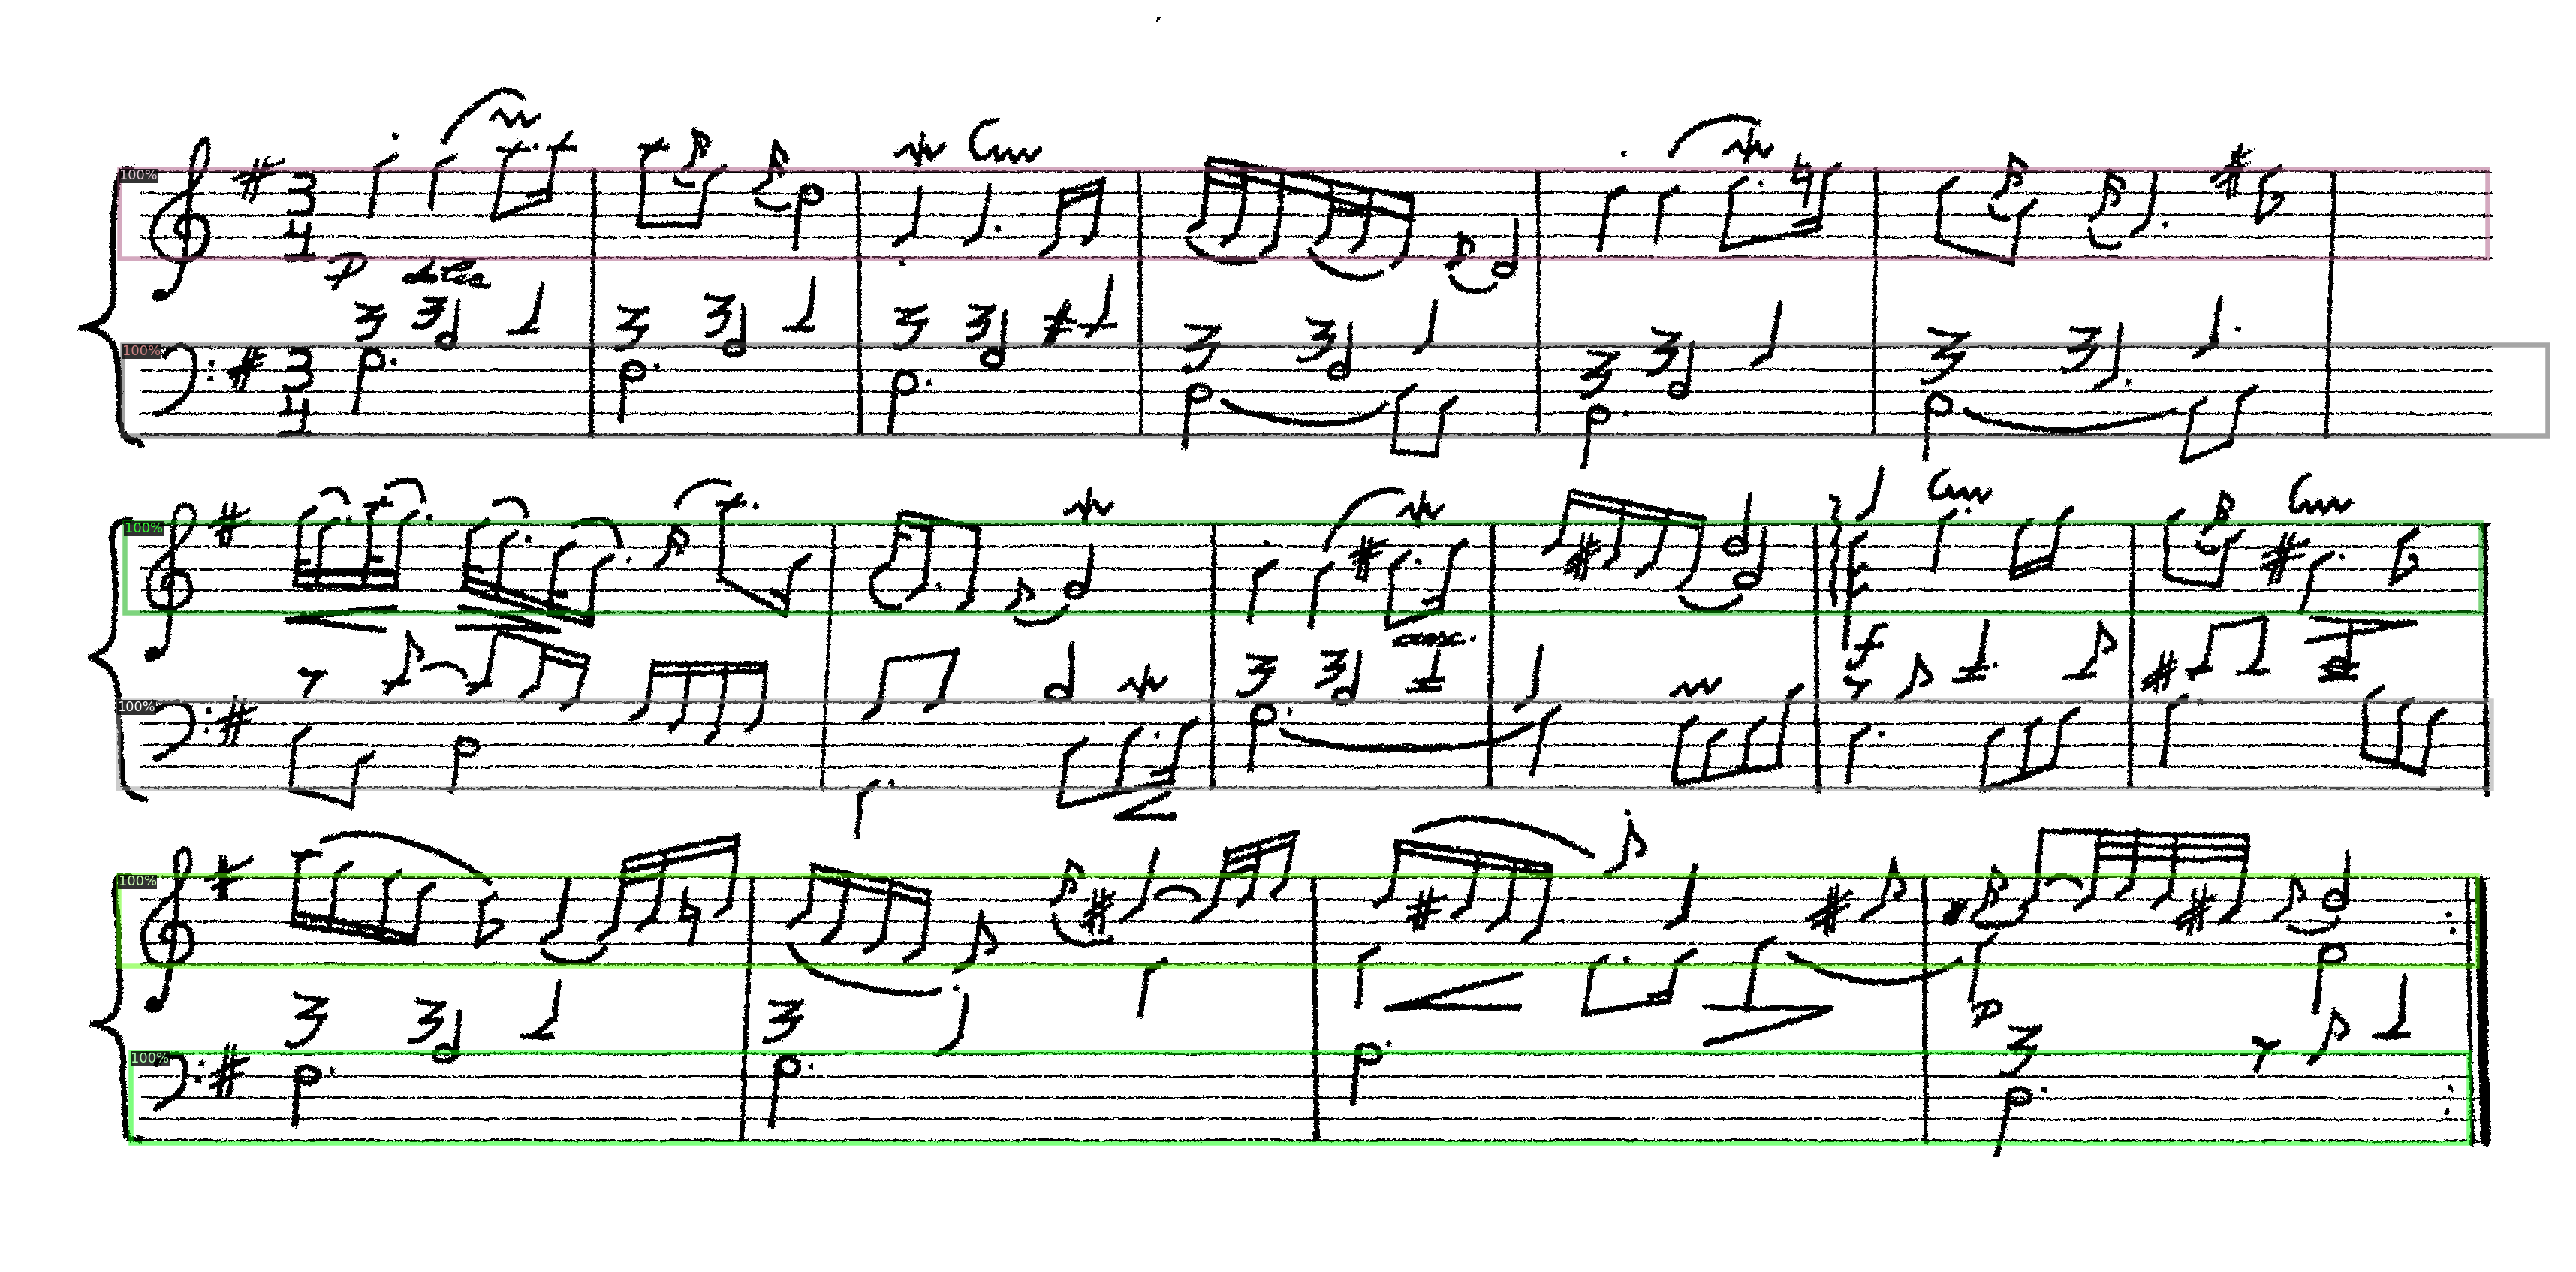

./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\staffline-thickness-variation-v1\w-27\p002.png


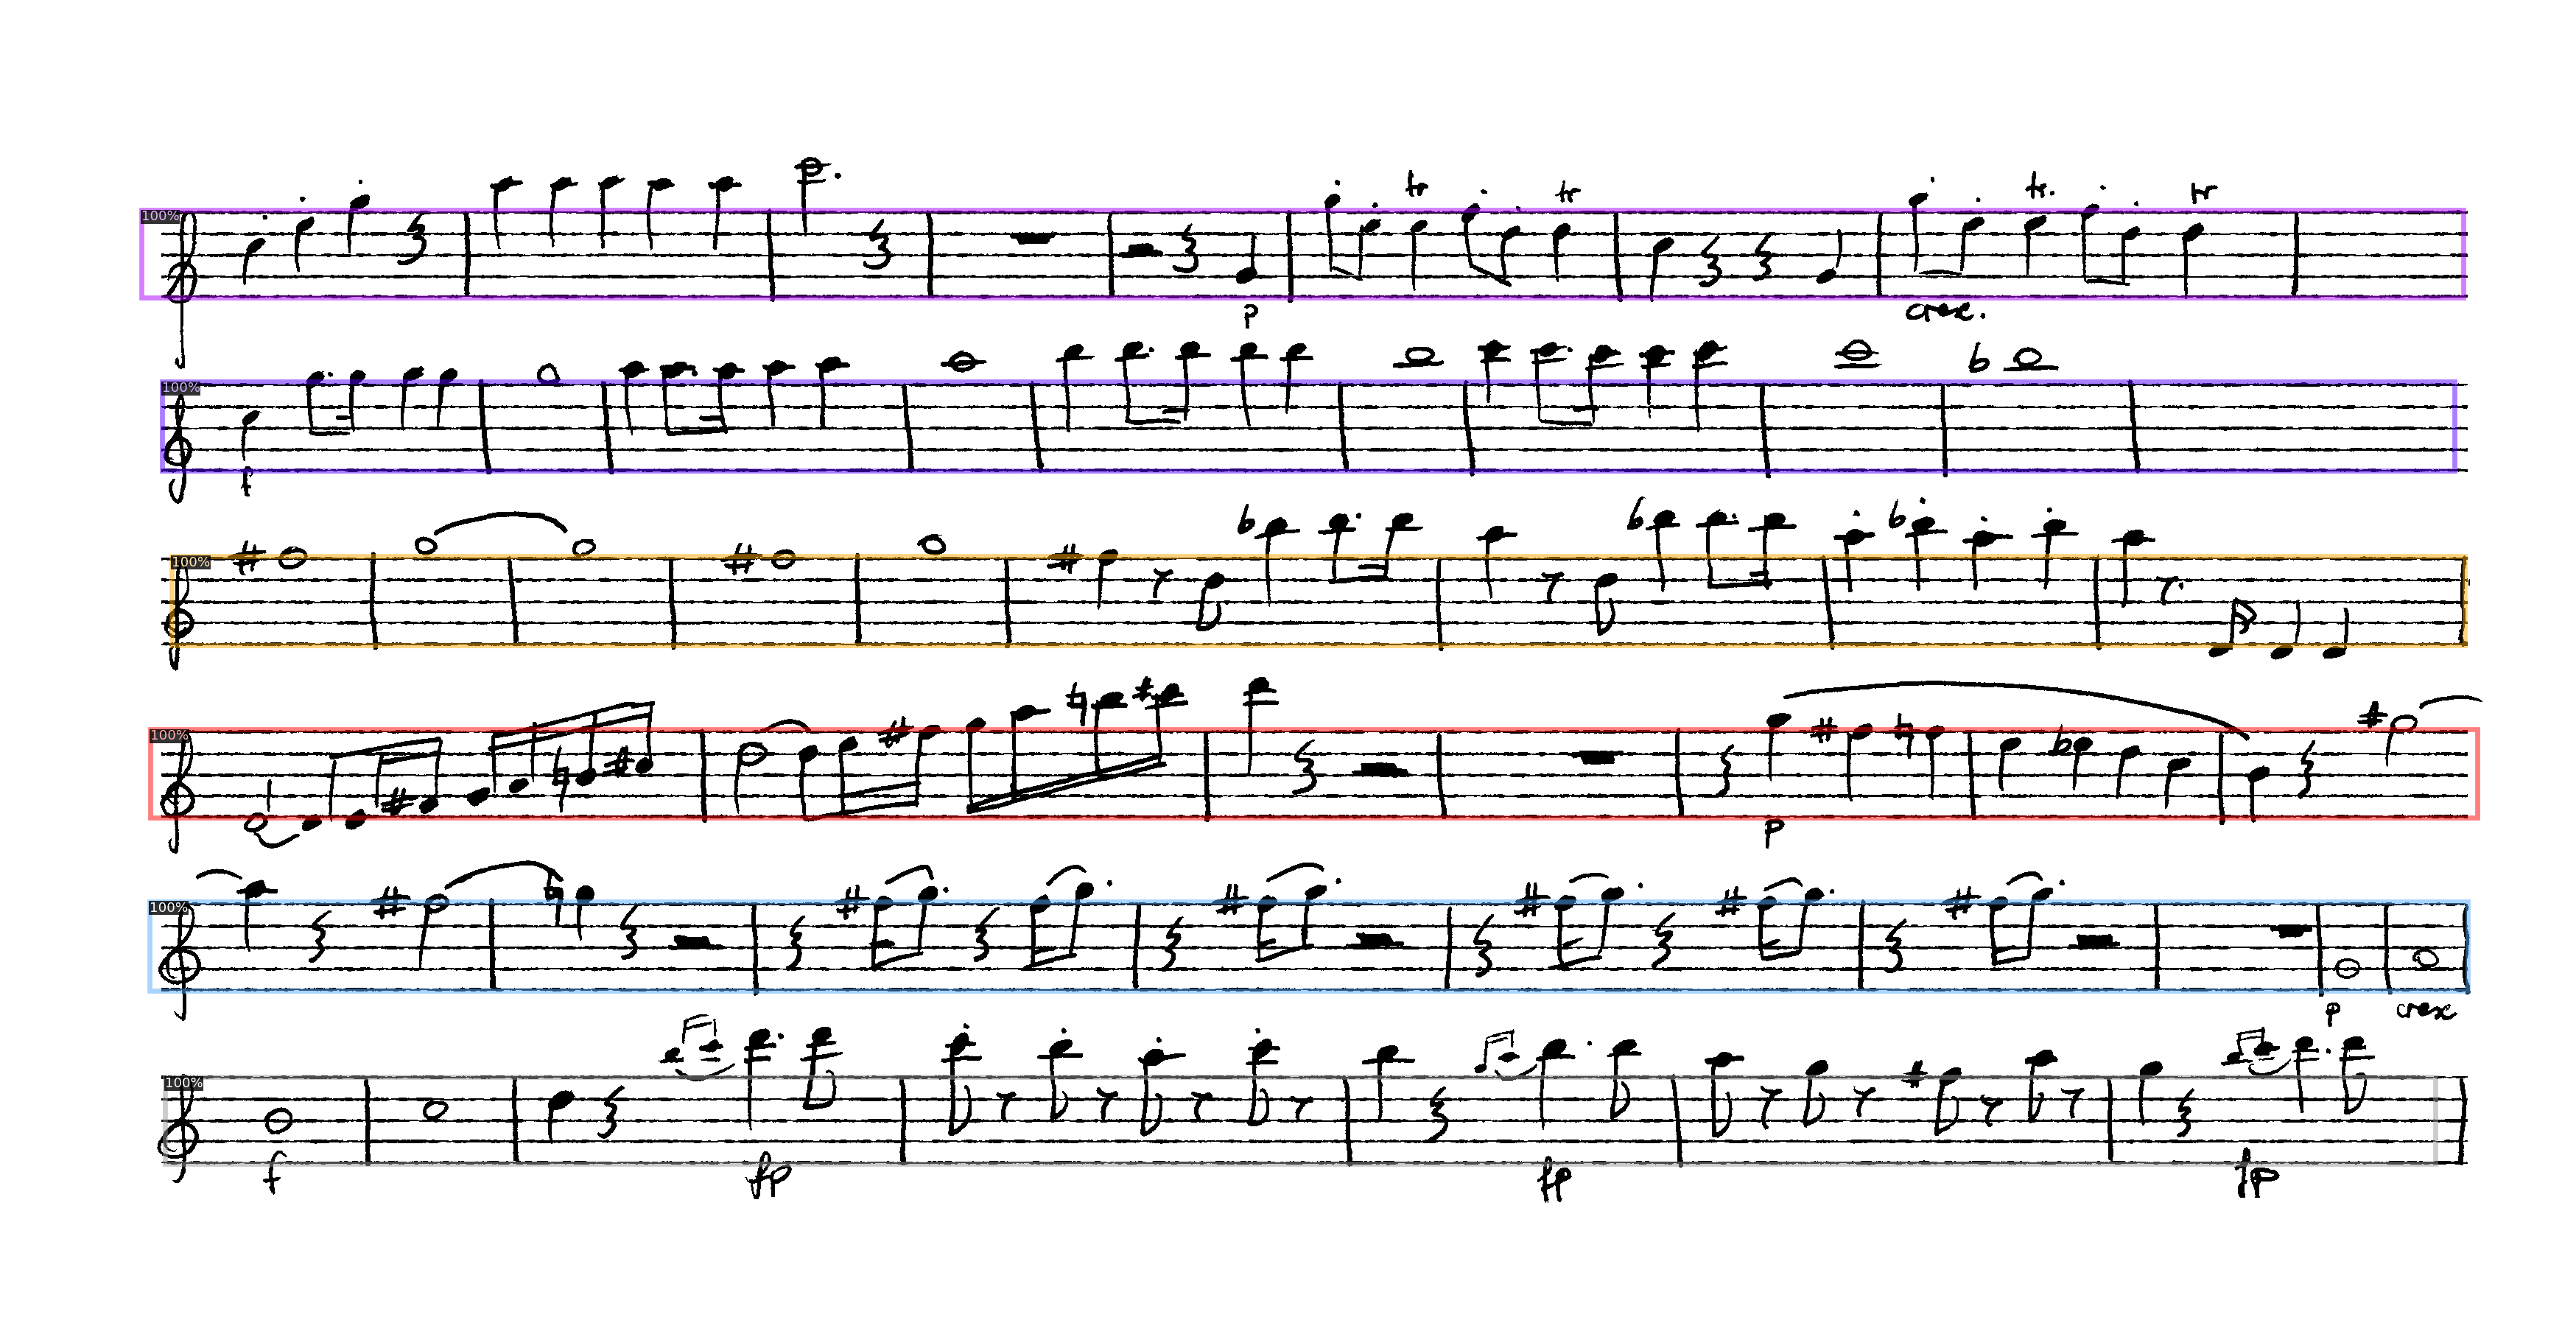

./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\staffline-thickness-variation-v2\w-42\p011.png


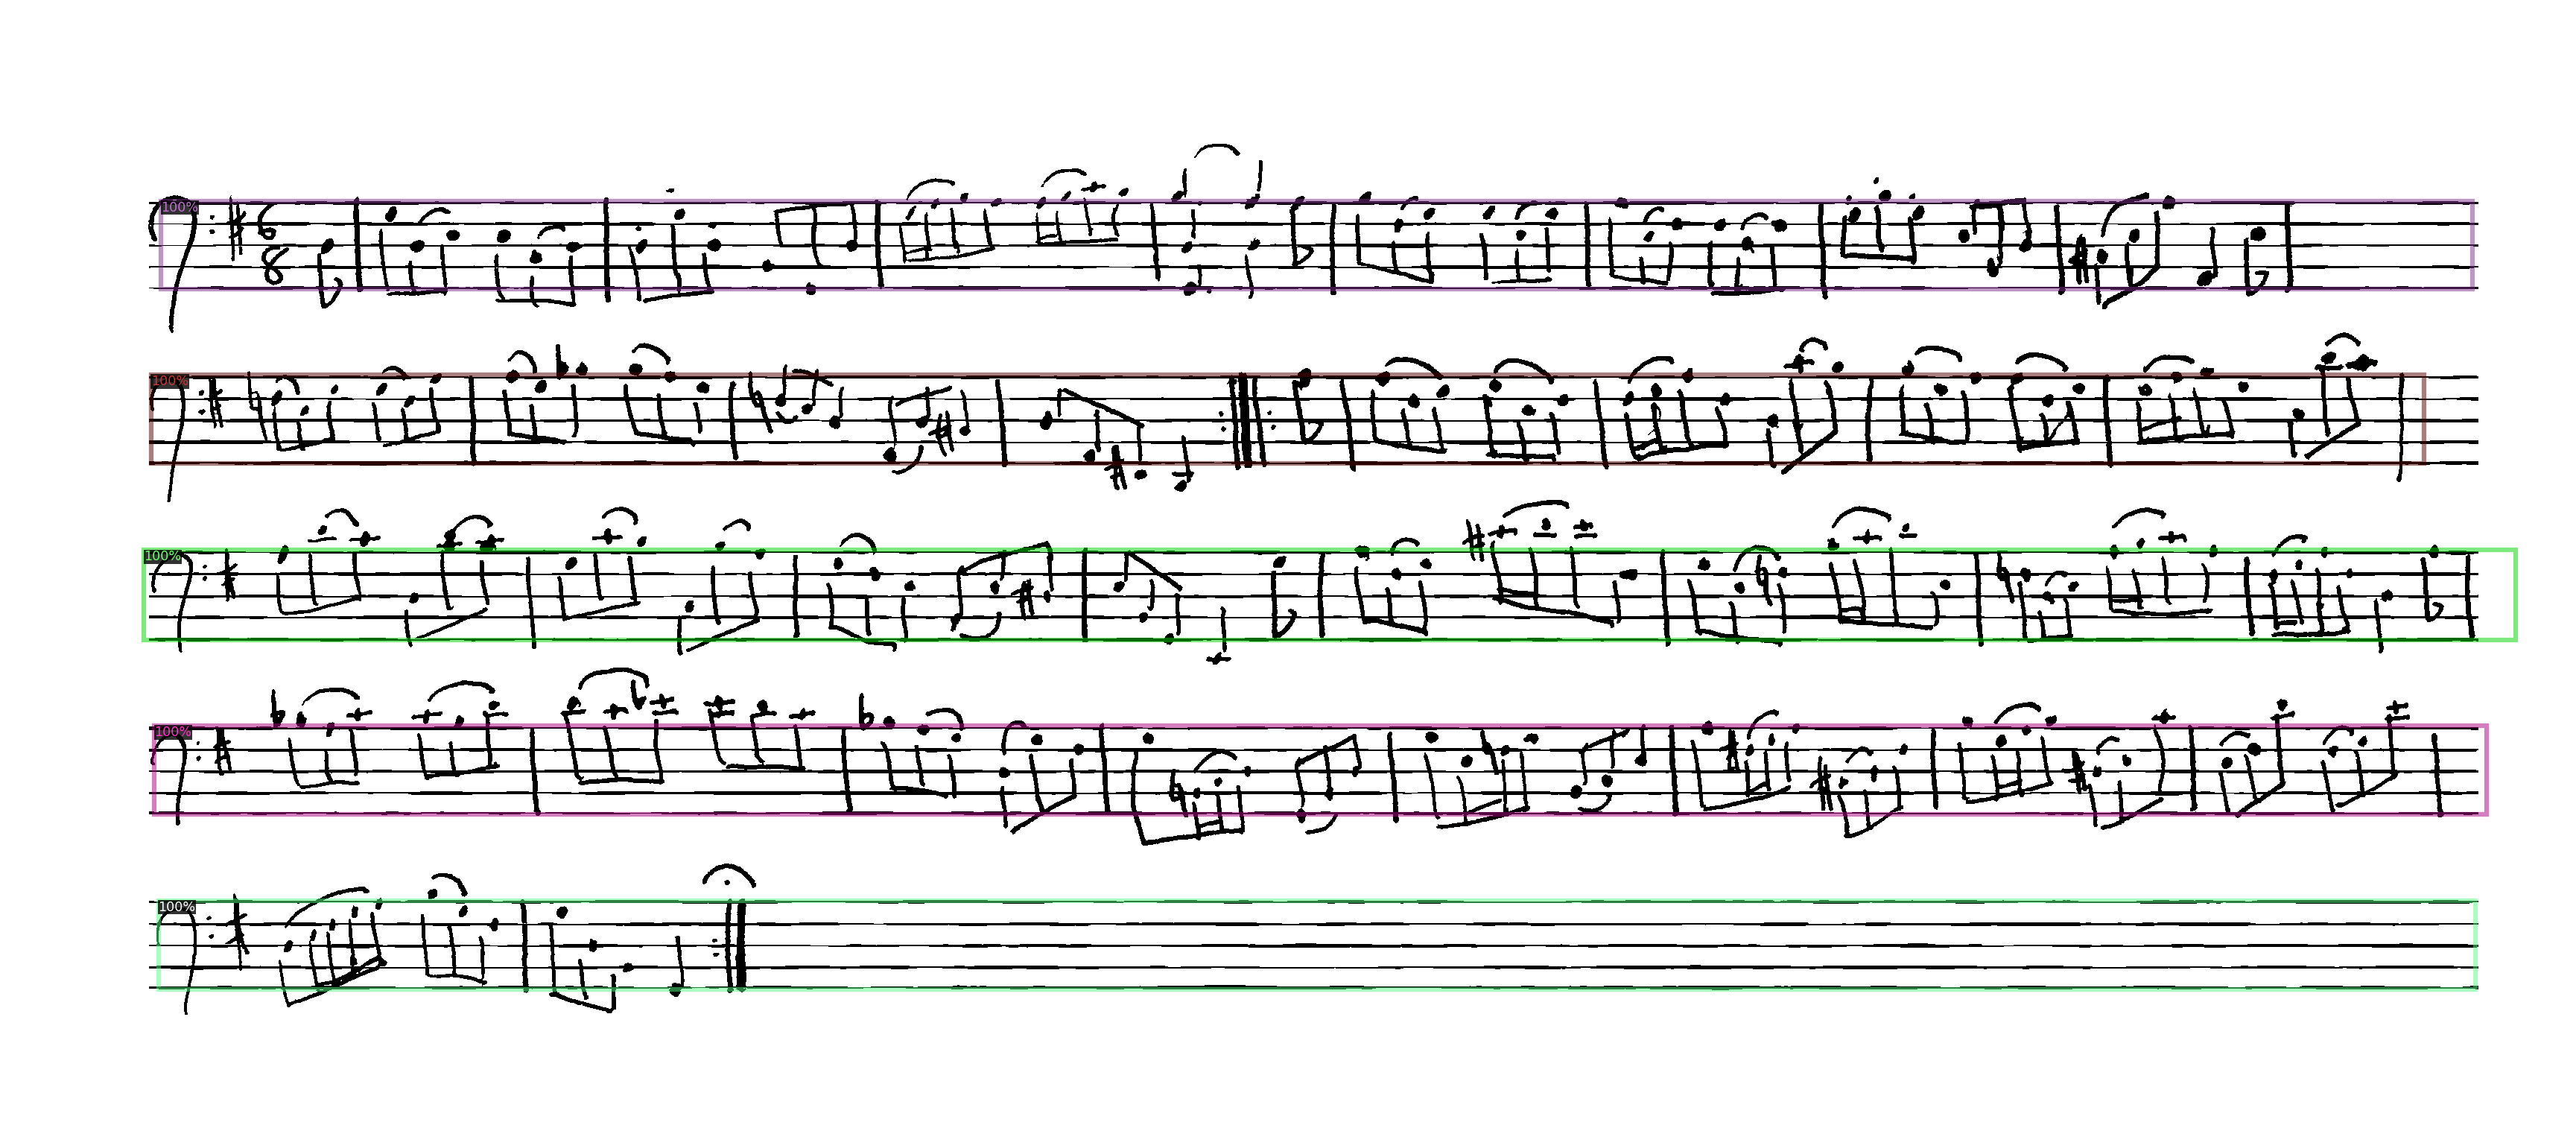

./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\staffline-y-variation-v1\w-02\p017.png


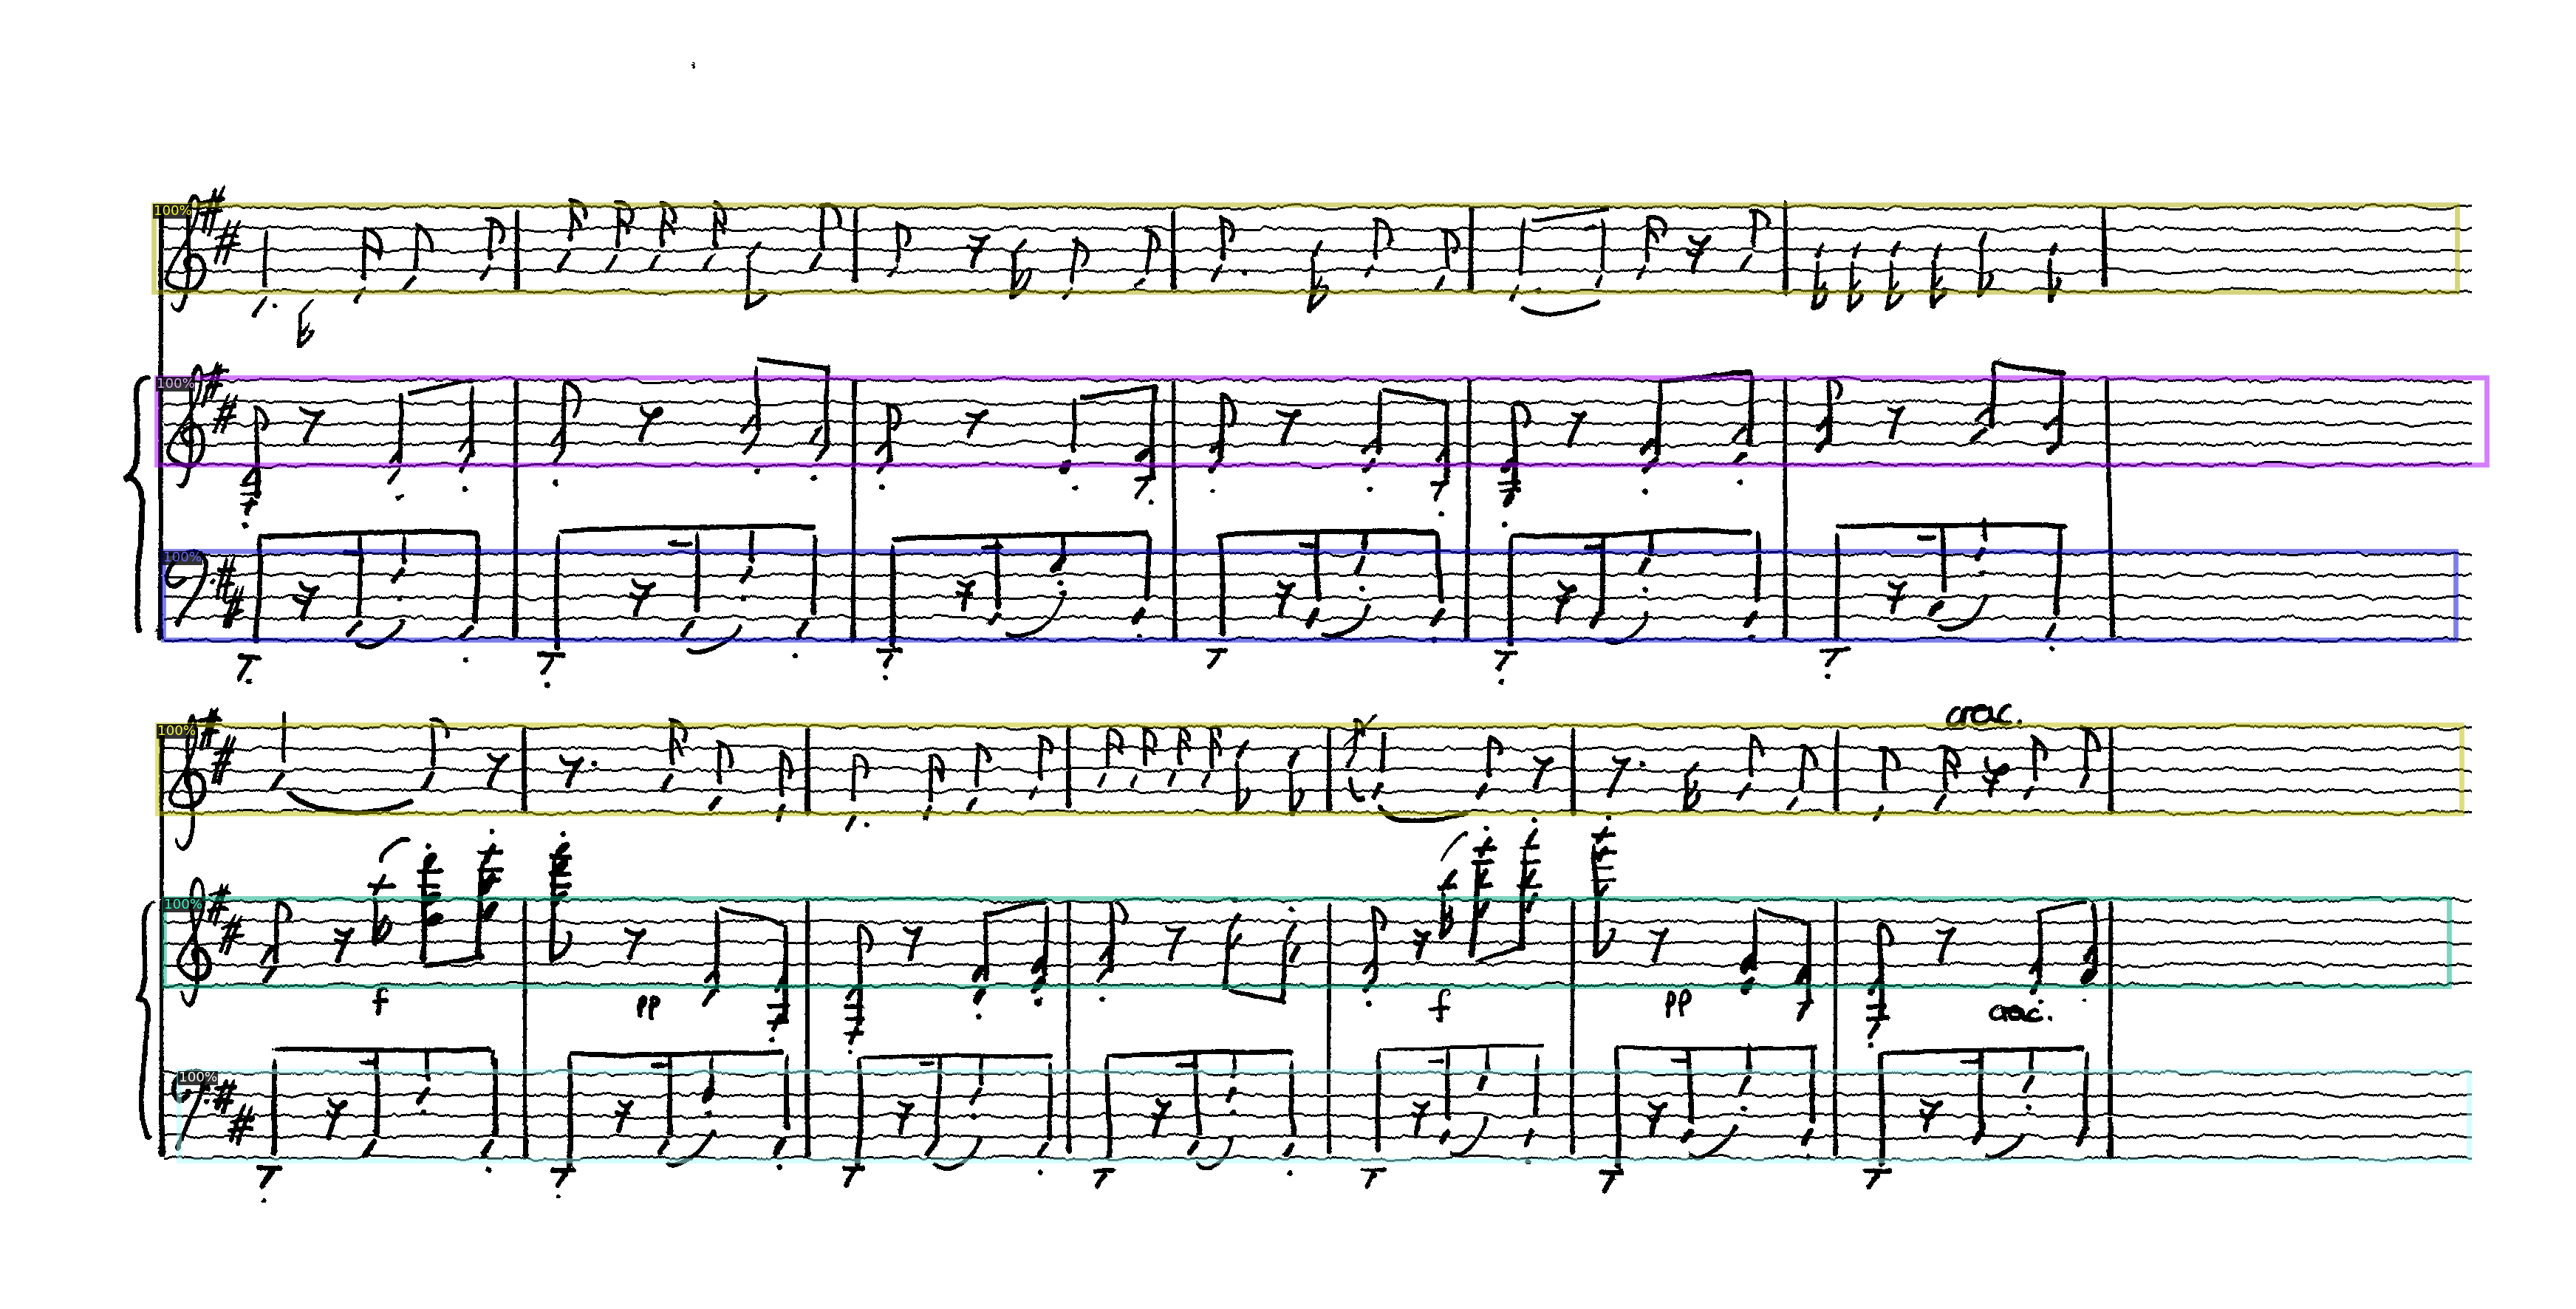

./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\kanungo\w-02\p006.png


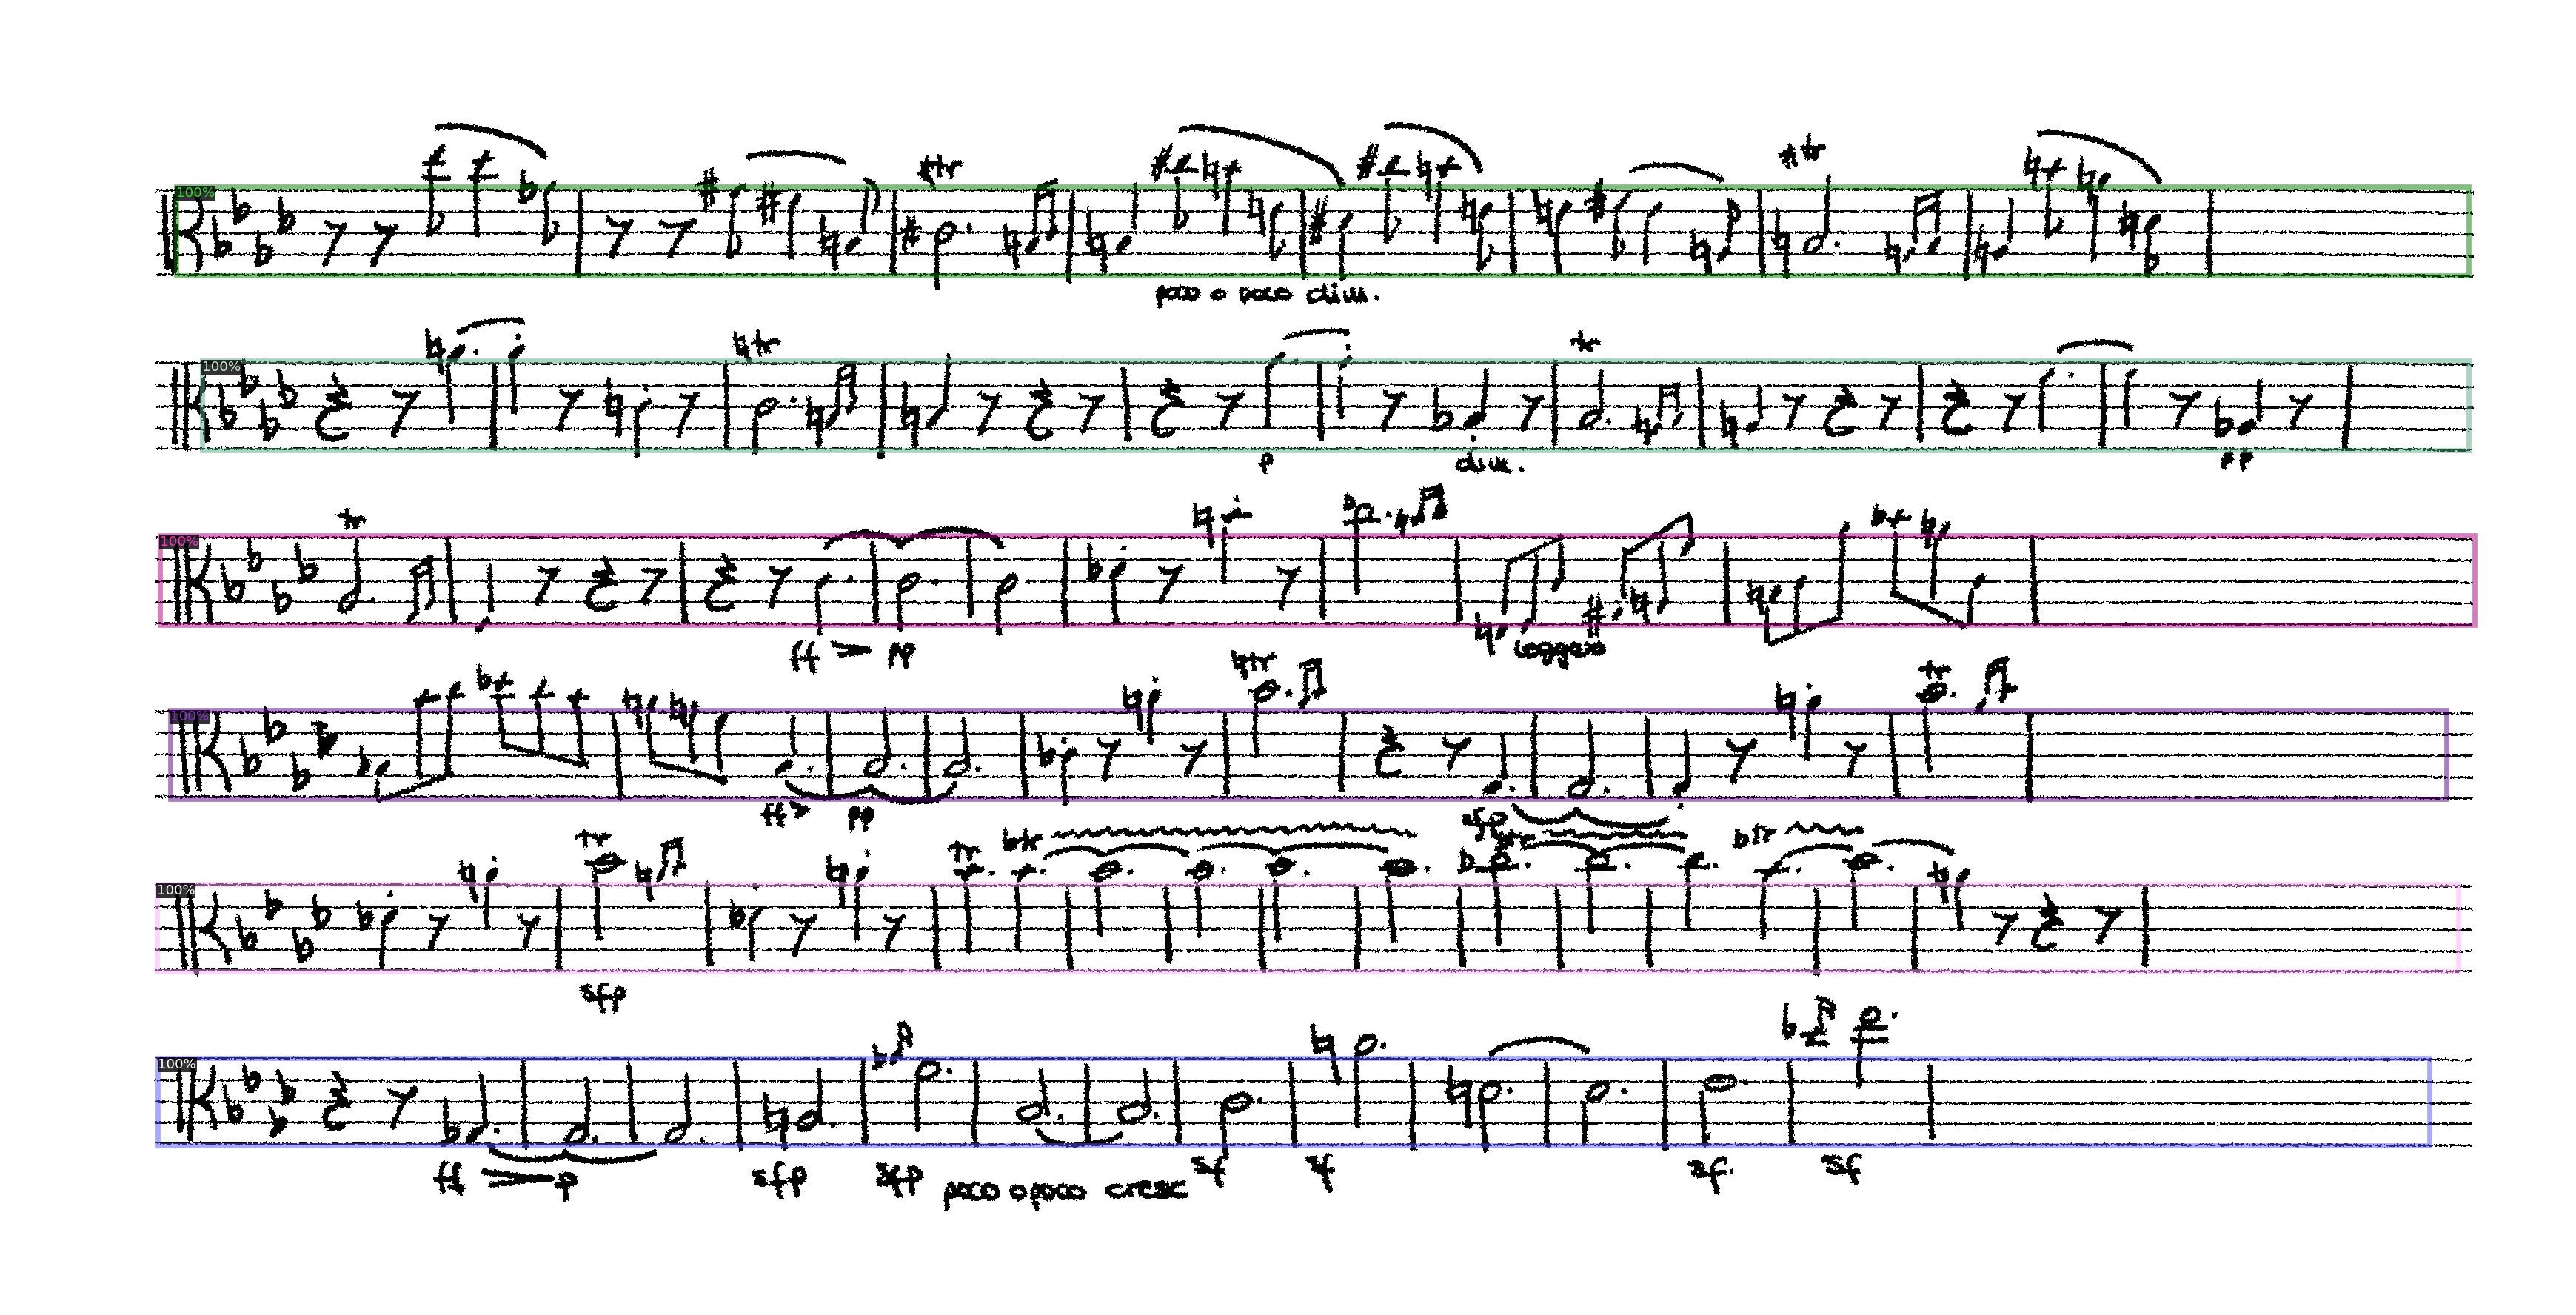

In [12]:
ImageDisplayer().displayRandomPredictData(predictor, muscima_data, muscima_metadata, 5)


./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086B-2\img\Wagner_WWV086B_096.png


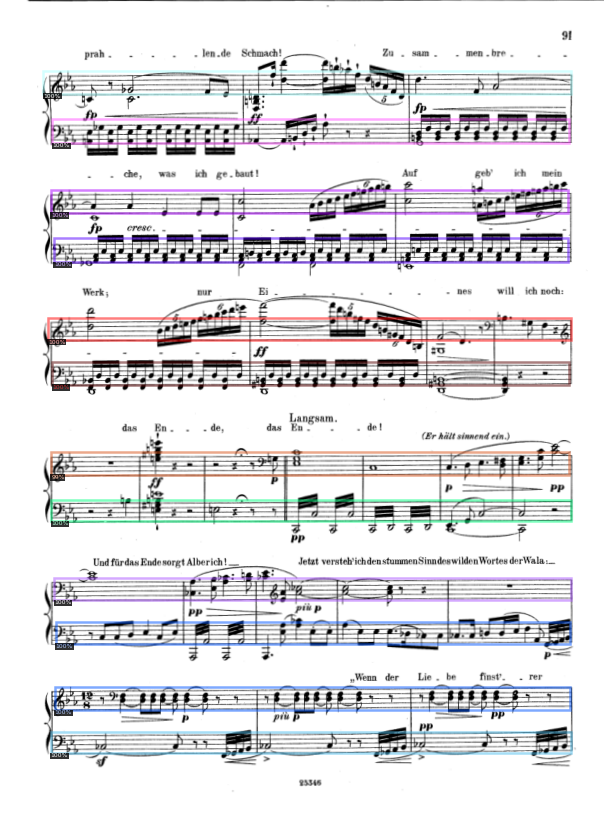

./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086C-3\img\Wagner_WWV086C_236.png


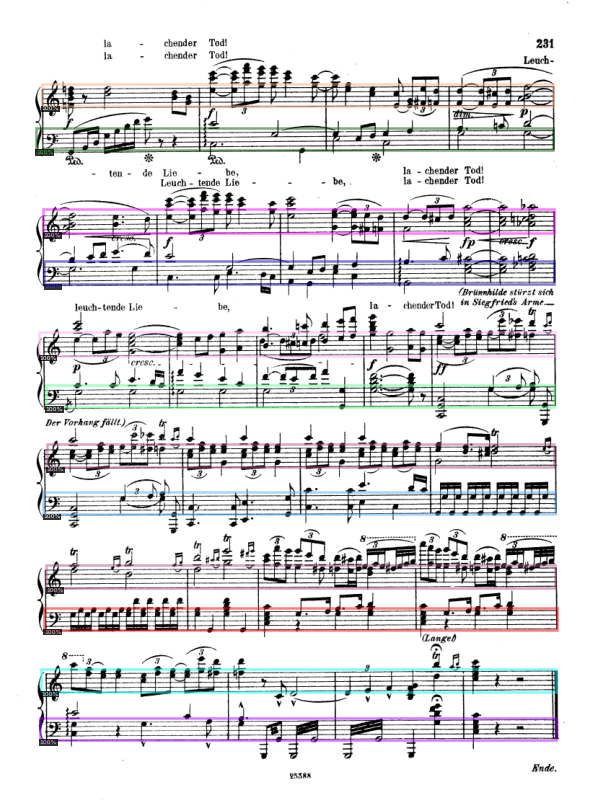

./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086D-3\img\Wagner_WWV086D_186.png


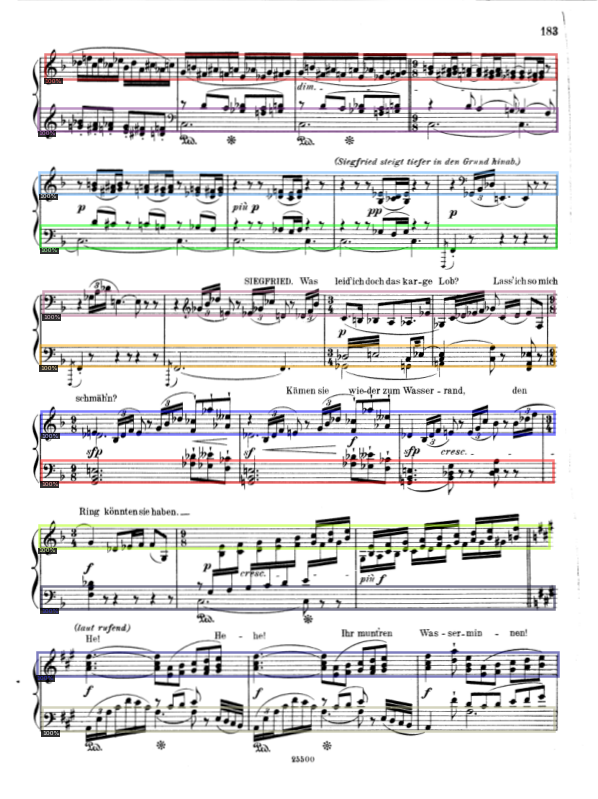

./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086B-1\img\Wagner_WWV086B_030.png


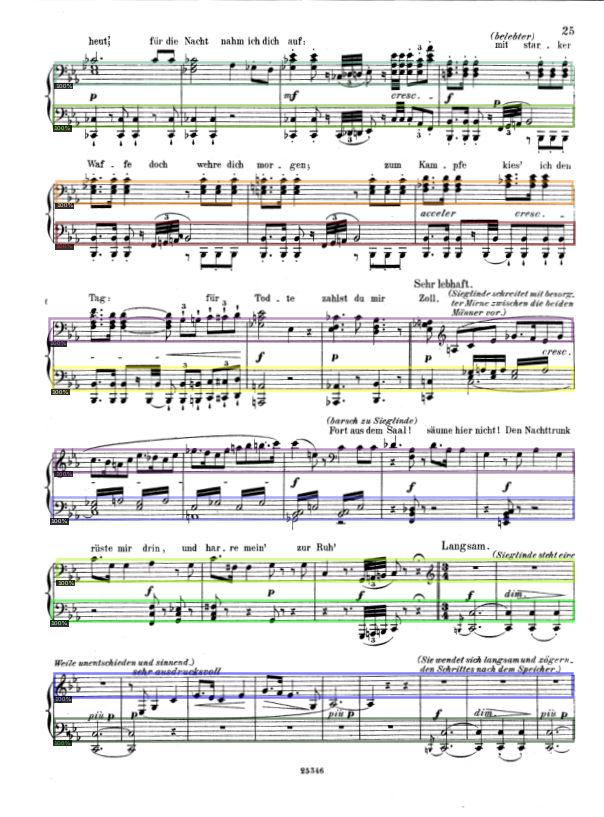

./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086A\img\Wagner_WWV086A_096.png


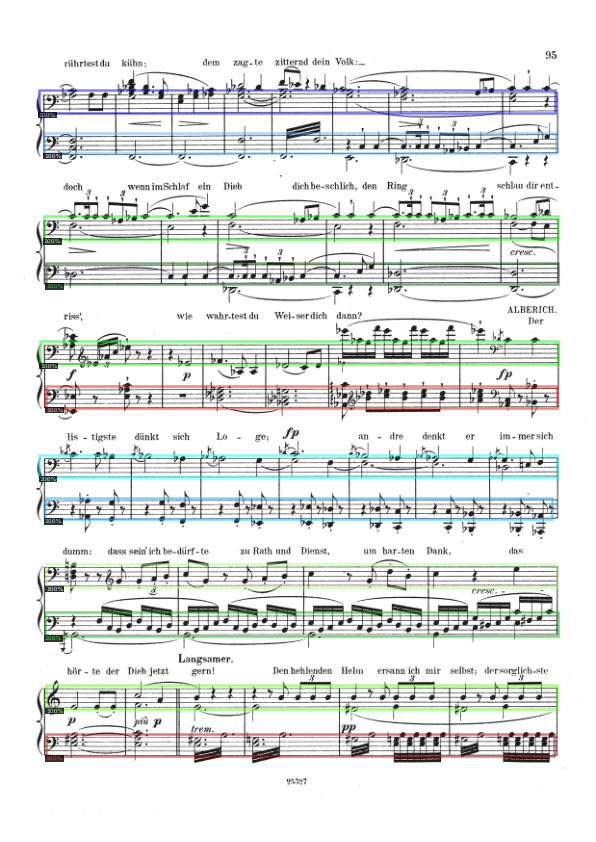

In [13]:
ImageDisplayer().displayRandomPredictData(predictor, audioLabs_data, audioLabs_metadata, 5)
